### KLASIFIKASI VEHICLE DATASET

##### SALSABILA WARDAH 
##### 23083010092
##### PRAKTIKUM EKSPLORASI DATA ANALISIS

#### DESKRIPSI KASUS
###### Data yang digunakan merupakan data yang berisi Informasi tentang penjualan mobil bekas di Negara India yang dikumpulkan dari Transaksi mobil bekas di pasaran otomotif India. Alasan memilih dataset ini karena ketersediaan data yang beragam dan datanya merupakan data nyata dari industri otomotif, sehingga dapat mendukung pengambilan keputusan saat ingin membeli mobil.
#### Dalam data tersebut variabel - variabel yang diamati, berupa :
###### 1. Name
###### 2. Year
###### 3. Selling_Price
###### 4. Km_Driven
###### 5. Fuel
###### 6. Seller_Type
###### 7. Transmission
###### 8. Owner

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [6]:
vehicle_dataset = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/dataset bdl.csv")
vehicle_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
vehicle_dataset['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

### PREPROCESSING DATA
##### MENGATASI MISSING VALUE

In [9]:
np.sum(vehicle_dataset.isnull())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
vehicle_datasetcopy=vehicle_dataset.copy()

In [11]:
vehicle_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
var_kategori = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']
for feature in var_kategori:
        if feature in vehicle_dataset.columns.values:
            vehicle_dataset[feature] = LabelEncoder().fit_transform(vehicle_dataset[feature])
            vehicle_dataset[feature] = vehicle_dataset[feature].astype('category')

In [14]:
vehicle_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4340 non-null   category
 1   year           4340 non-null   category
 2   selling_price  4340 non-null   category
 3   km_driven      4340 non-null   category
 4   fuel           4340 non-null   category
 5   seller_type    4340 non-null   category
 6   transmission   4340 non-null   category
 7   owner          4340 non-null   category
dtypes: category(8)
memory usage: 120.5 KB


In [15]:
vehicle_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,13,17,474,4,1,1,0
1,1041,13,60,335,4,1,1,0
2,505,18,236,607,1,1,1,0
3,118,23,114,309,4,1,1,0
4,279,20,193,681,1,1,1,2


### MENGECEK DATA OUTLINER

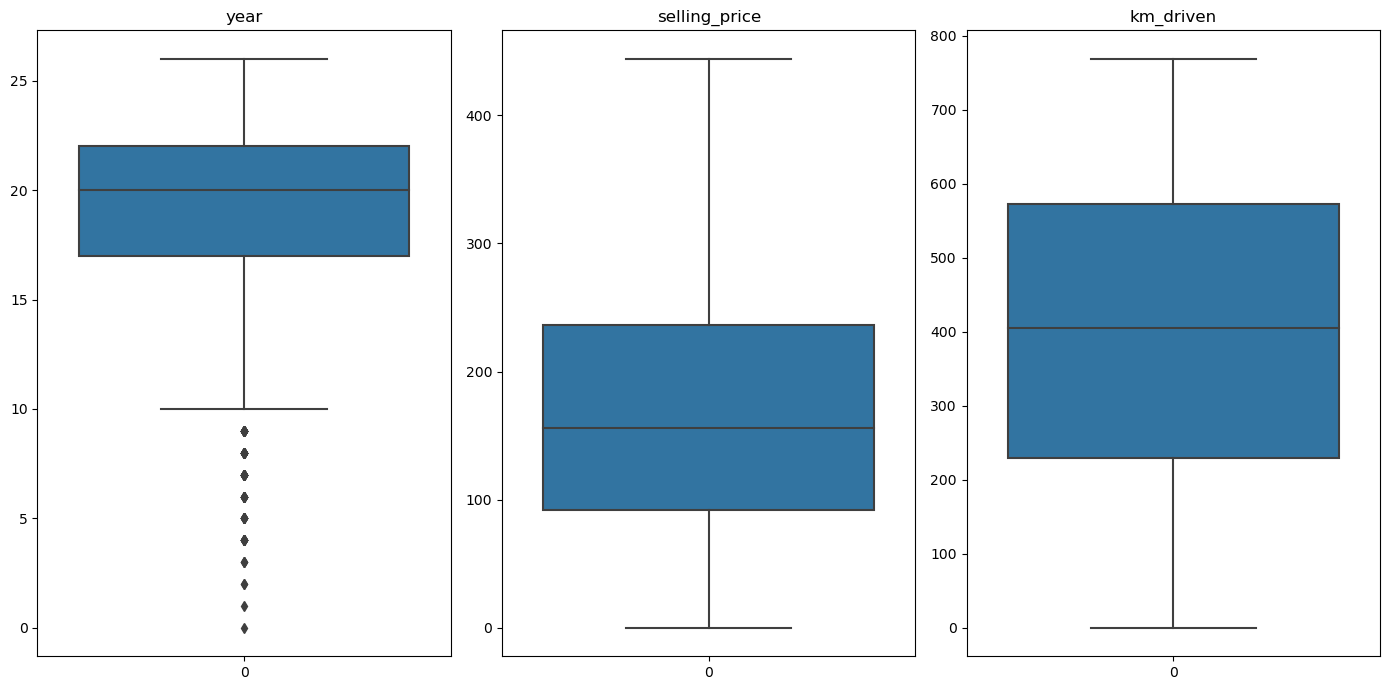

In [16]:
vehicle_dataset_cont = vehicle_dataset.drop(['name','fuel', 'seller_type', 'transmission', 'owner'], axis=1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,7))
feature_index = 0
for jj in range(3):
    if feature_index < len(vehicle_dataset_cont.columns):
        ax = sns.boxplot(vehicle_dataset_cont.iloc[:, feature_index],ax=axes[jj])
        ax.set(title=vehicle_dataset_cont.columns.values[feature_index])      
        feature_index += 1
plt.tight_layout()
plt.show()

In [17]:
vehicle_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4340 non-null   category
 1   year           4340 non-null   category
 2   selling_price  4340 non-null   category
 3   km_driven      4340 non-null   category
 4   fuel           4340 non-null   category
 5   seller_type    4340 non-null   category
 6   transmission   4340 non-null   category
 7   owner          4340 non-null   category
dtypes: category(8)
memory usage: 120.5 KB


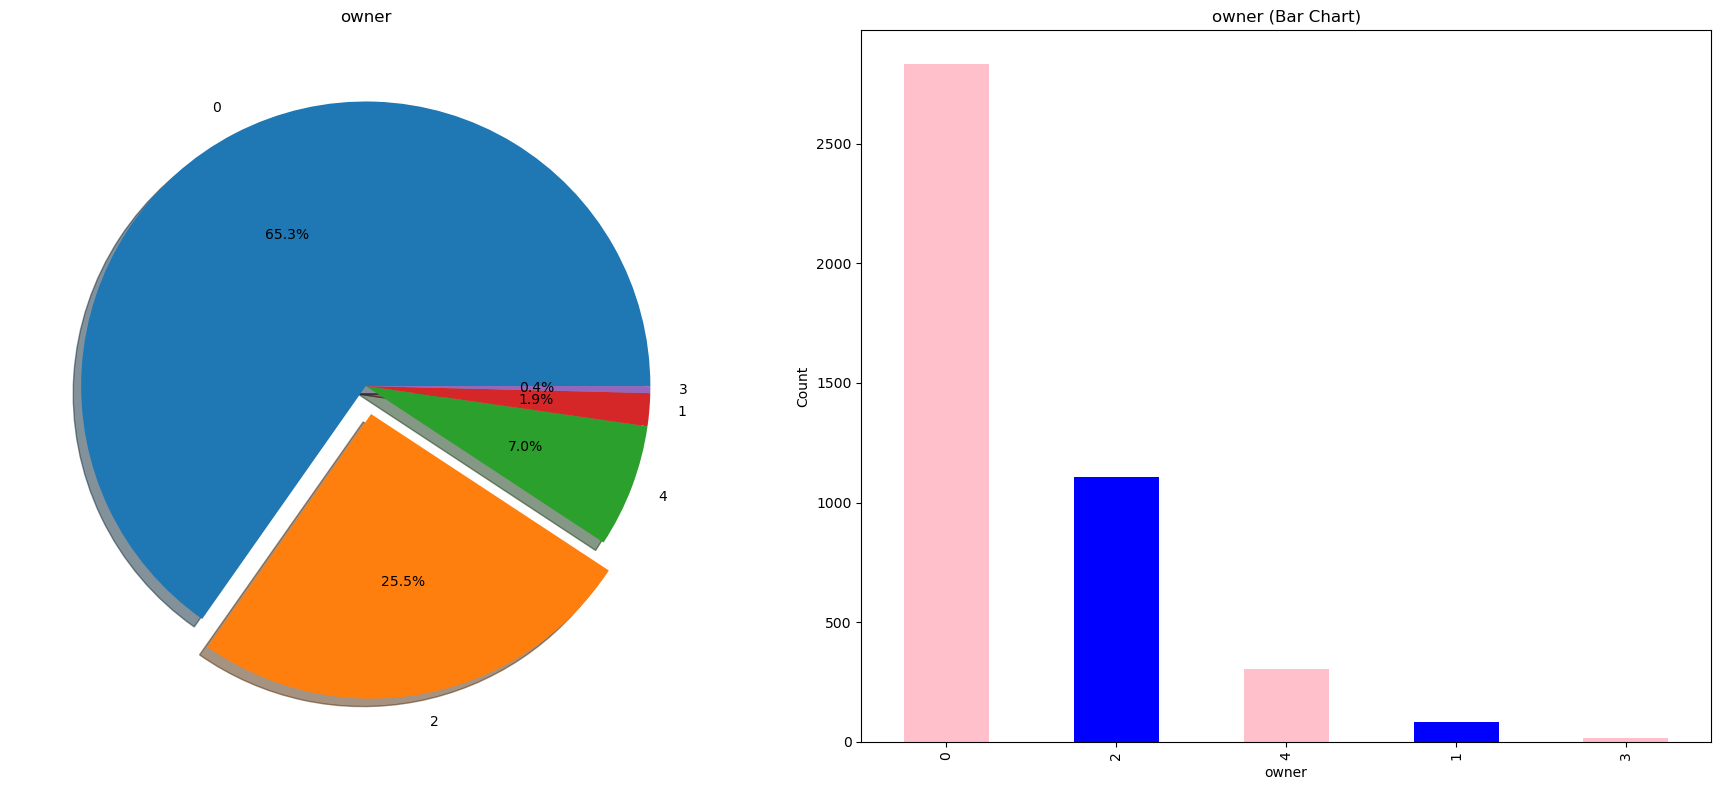

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Misalnya, data['Gender'] adalah sebuah pandas Series
# Gender categories
data1 = {'owner': ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']}
df = pd.DataFrame(vehicle_dataset)   

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Hitung jumlah kategori
owner_counts = df['owner'].value_counts()
num_categories = len(owner_counts)

# Sesuaikan panjang explode
explode = [0] * num_categories  # Daftar explode dengan nilai 0
if num_categories > 1:
    explode[1] = 0.1  # Misalnya, meledakkan kategori kedua hanya jika ada lebih dari 1 kategori

# Plot pie chart
owner_counts.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('owner')
ax[0].set_ylabel('')

owner_counts.plot.bar(ax=ax[1], color=['pink', 'blue'])
ax[1].set_title('owner (Bar Chart)')
ax[1].set_xlabel('owner')
ax[1].set_ylabel('Count')

# Tampilkan plot
plt.tight_layout()
plt.show()

In [19]:
print(vehicle_dataset)

      name year selling_price km_driven fuel seller_type transmission owner
0      775   13            17       474    4           1            1     0
1     1041   13            60       335    4           1            1     0
2      505   18           236       607    1           1            1     0
3      118   23           114       309    4           1            1     0
4      279   20           193       681    1           1            1     2
...    ...  ...           ...       ...  ...         ...          ...   ...
4335   602   20           178       528    1           1            1     2
4336   601   20           178       528    1           1            1     2
4337   777   15            48       547    4           1            1     2
4338   381   22           318       573    1           1            1     0
4339  1154   22           102       257    4           1            1     0

[4340 rows x 8 columns]


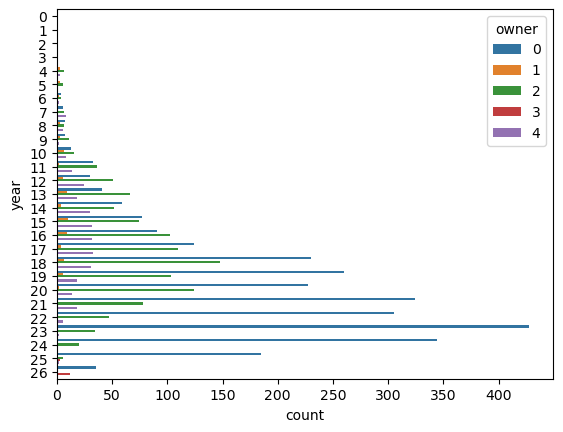

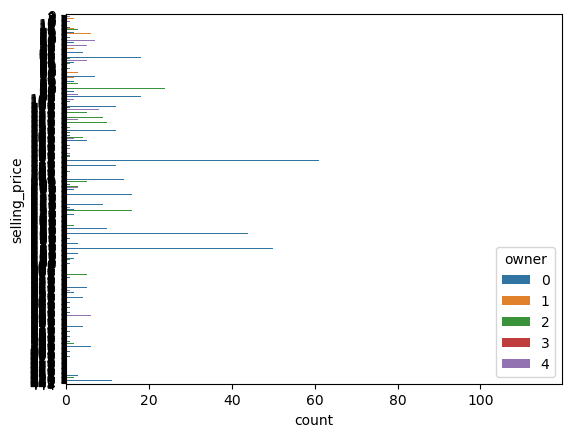

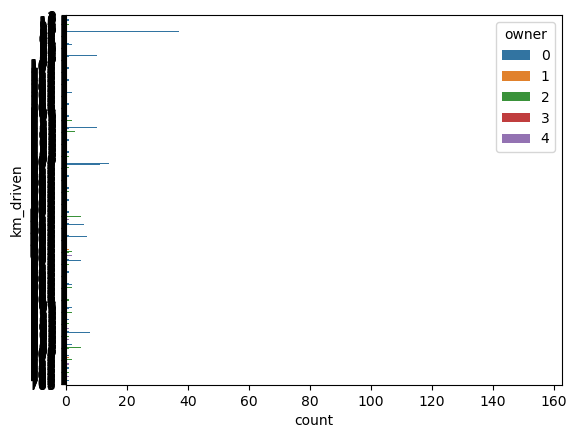

In [21]:
sns.countplot(y=vehicle_dataset["year"], hue=vehicle_dataset["owner"])
plt.show()
sns.countplot(y=vehicle_dataset["selling_price"], hue=vehicle_dataset["owner"])
plt.show()
sns.countplot(y=vehicle_dataset["km_driven"], hue=vehicle_dataset["owner"])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_48300\2151199812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicle_dataset["name"])
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


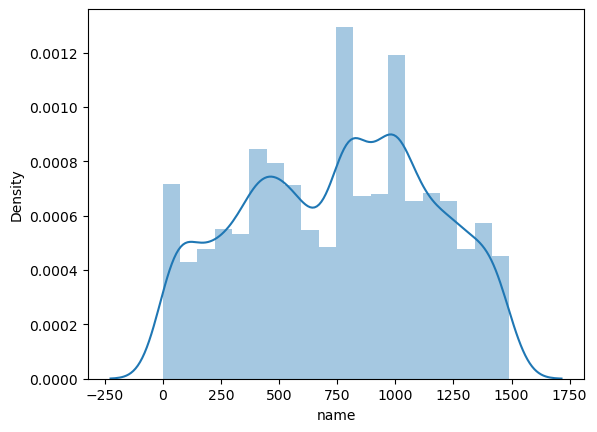

In [23]:
sns.distplot(vehicle_dataset["name"])
plt.show()

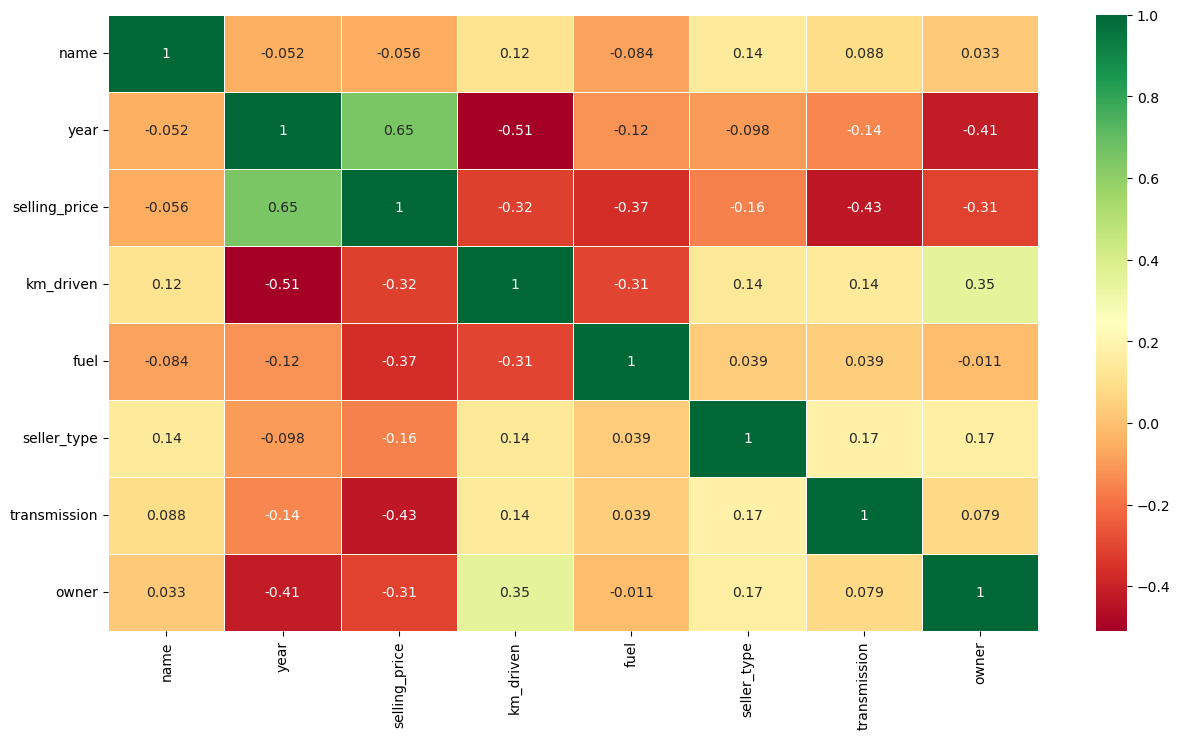

In [24]:
sns.heatmap(vehicle_dataset.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()